In [15]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [29]:
f = h5py.File('../data/Outfile_CellInformation.h5','r')

In [31]:
# for x in f.keys():
#     print(x)

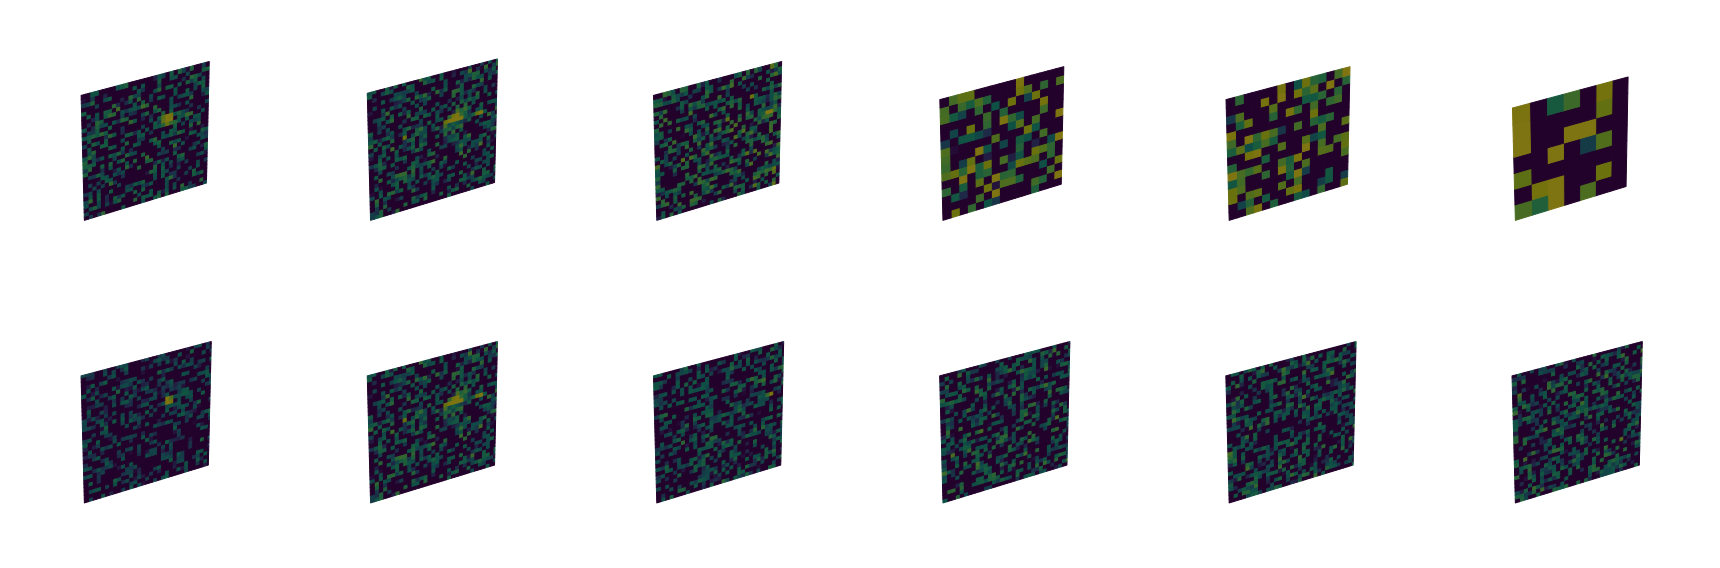

In [71]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt,numpy as np
norm = plt.Normalize()

event_index = 125

fig = plt.figure(figsize=(6*4,8))



ax_list = []
for layer_i in range(6):
    for res_i, res in enumerate(['RealRes','UniformRes']):
        ax_list.append( fig.add_subplot(2, 6, layer_i+1+6*res_i, projection='3d') ) 

        ax_list[-1].view_init(elev=30, azim=-30)

        X = f[res+'_TotalEnergy_Layer'+str(layer_i+1)][event_index]
        layer_size = X.shape[1]
        X = X.reshape(layer_size,layer_size)
        small_x = 2.5*np.ones((layer_size,layer_size))
        Z, Y = np.meshgrid(range(layer_size),range(layer_size))
        
        X[X < 0] = 0
        X[X > 0] = np.log(X[X>0])
        X = X/5
        ax_list[-1].plot_surface(small_x, Y, Z, 
                                facecolors=plt.cm.viridis(X))

        ax_list[-1].set_xlabel('X')
        ax_list[-1].set_xlim(0,5)
        ax_list[-1].set_ylabel('Y')
        ax_list[-1].set_ylim(0, layer_size)
        ax_list[-1].set_zlabel('Z')
        ax_list[-1].set_zlim(0, layer_size)
        ax_list[-1].set_axis_off()
    
plt.tight_layout()    
plt.show()